<a href="https://colab.research.google.com/github/Nuwantha005/EN3150_Group_Assignment/blob/main/EN_3150_Second_Try.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
alsaniipe_jute_pest_path = kagglehub.dataset_download('alsaniipe/jute-pest')

print('Data source import complete.')


100%|██████████| 156M/156M [00:01<00:00, 95.6MB/s]

Extracting files...


Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

data_paths = []

import os
for dirname, _, filenames in os.walk(alsaniipe_jute_pest_path):
    for filename in filenames:
        data_paths.append(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
data_paths

['/root/.cache/kagglehub/datasets/alsaniipe/jute-pest/versions/1/Jute_Pest_Dataset/Jute_Pest_Dataset/test/Termite/Aug_SL8 Microtermes obesi Holmgren_303.jpg',
 '/root/.cache/kagglehub/datasets/alsaniipe/jute-pest/versions/1/Jute_Pest_Dataset/Jute_Pest_Dataset/test/Termite/Aug_SL8 Microtermes obesi Holmgren_307.jpg',
 '/root/.cache/kagglehub/datasets/alsaniipe/jute-pest/versions/1/Jute_Pest_Dataset/Jute_Pest_Dataset/test/Termite/Aug_SL8 Microtermes obesi Holmgren_301.jpg',
 '/root/.cache/kagglehub/datasets/alsaniipe/jute-pest/versions/1/Jute_Pest_Dataset/Jute_Pest_Dataset/test/Termite/Aug_SL8 Microtermes obesi Holmgren_320.jpg',
 '/root/.cache/kagglehub/datasets/alsaniipe/jute-pest/versions/1/Jute_Pest_Dataset/Jute_Pest_Dataset/test/Termite/Aug_SL8 Microtermes obesi Holmgren_318.jpg',
 '/root/.cache/kagglehub/datasets/alsaniipe/jute-pest/versions/1/Jute_Pest_Dataset/Jute_Pest_Dataset/test/Termite/Aug_SL8 Microtermes obesi Holmgren_300.jpg',
 '/root/.cache/kagglehub/datasets/alsaniipe/ju

### Importing Required Packages

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import math
import keras

### Froming the Dataset

In [ ]:
labels = [path.split("/")[-2] for path in data_paths]  # Extract label from directory name
encoder = LabelEncoder()
y = encoder.fit_transform(labels)  # Convert labels to integers

# Load images and resize to consistent size (e.g., 128x128)
x = np.array([tf.keras.utils.load_img(path, target_size=(128, 128)) for path in data_paths])
x = np.array([tf.keras.utils.img_to_array(img) for img in x]) / 255.0  # Normalize to [0, 1]

# Convert labels to one-hot encoding
#y = tf.keras.utils.to_categorical(y)

#Label Encoding
y = encoder.fit_transform(labels)

# Step 2: Split Data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Printing the Samples

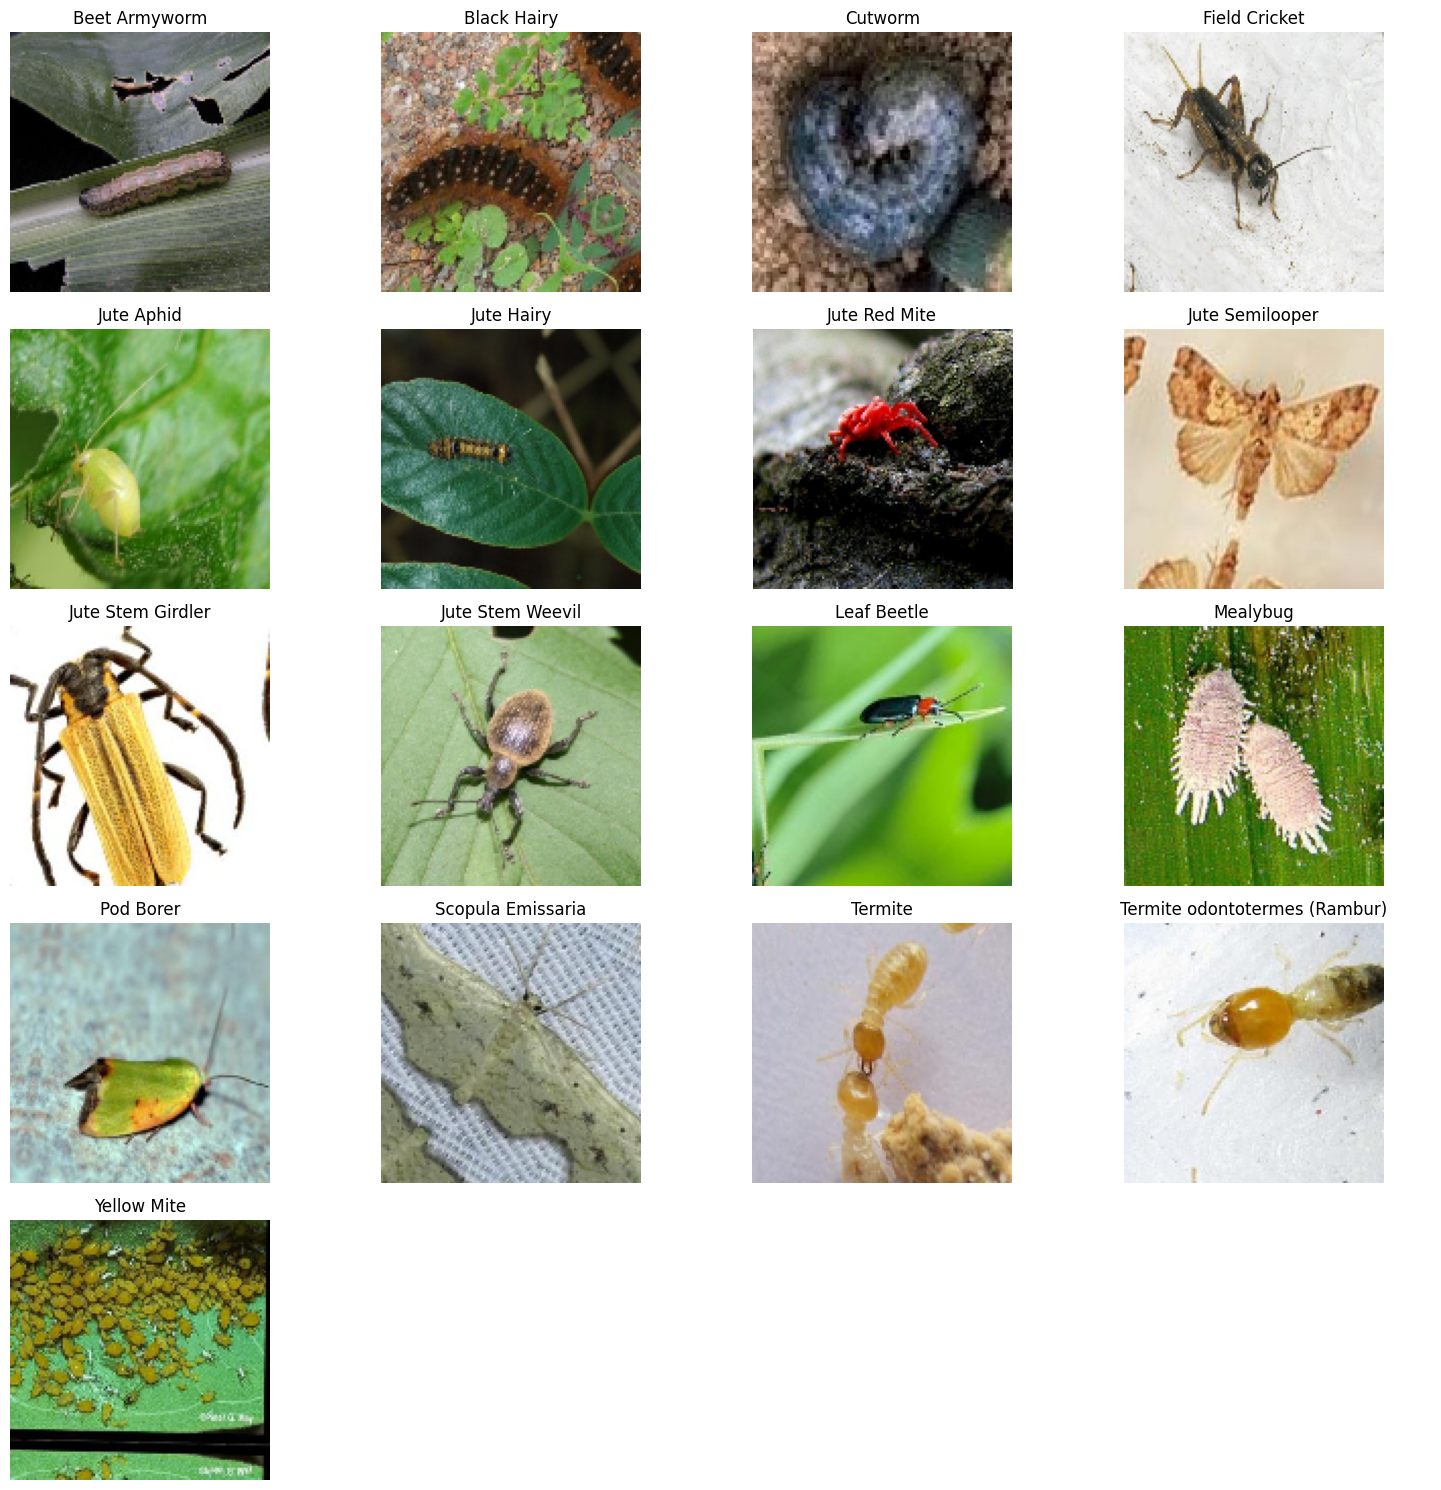

In [ ]:
# Group samples by class
class_samples = {class_name: [] for class_name in encoder.classes_}

# Collect samples for each class
for img, label in zip(x, labels):  # Use raw labels to map correctly
    class_samples[label].append(img)

# Determine the number of classes and the number of rows needed
num_classes = len(class_samples)
num_cols = 4  # Number of images per row
num_rows = math.ceil(num_classes / num_cols)  # Calculate the number of rows needed

# Set up the figure
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3 * num_rows))  # Adjust height as needed
axes = axes.flatten()  # Flatten the 2D array of axes to iterate over easily

# Loop through classes and plot one sample per class
for i, (class_name, images) in enumerate(class_samples.items()):
    ax = axes[i]
    ax.imshow(images[0])  # Show the first image for each class
    ax.set_title(class_name)
    ax.axis('off')  # Hide axes for a cleaner look

# Hide any remaining empty subplots if the number of classes is not a perfect multiple of 4
for j in range(num_classes, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


### Building the CNN

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)

# Step 3: Define a Simple CNN Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(encoder.classes_), activation='softmax')  # Classes count
])

# Compile the Model
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 17)                  │           2,193 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,306,833 (12.61 MB)

 Trainable params: 3,306,833 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

### Trainning the Model

In [ ]:
history = model.fit(
    x_train, y_train,
    epochs=20,
    validation_split=0.2,  # Automatically splits 40% of training data for validation
    verbose=2
)


Epoch 1/20
145/145 - 15s - 103ms/step - accuracy: 0.1752 - loss: 2.5804 - val_accuracy: 0.2582 - val_loss: 2.2703
Epoch 2/20
145/145 - 2s - 17ms/step - accuracy: 0.3600 - loss: 2.0237 - val_accuracy: 0.4033 - val_loss: 1.8768
Epoch 3/20
145/145 - 3s - 18ms/step - accuracy: 0.4523 - loss: 1.6808 - val_accuracy: 0.4905 - val_loss: 1.5944
Epoch 4/20
145/145 - 3s - 18ms/step - accuracy: 0.5691 - loss: 1.3372 - val_accuracy: 0.5656 - val_loss: 1.3435
Epoch 5/20
145/145 - 2s - 17ms/step - accuracy: 0.6639 - loss: 1.0550 - val_accuracy: 0.6347 - val_loss: 1.2385
Epoch 6/20
145/145 - 3s - 18ms/step - accuracy: 0.7449 - loss: 0.7873 - val_accuracy: 0.6339 - val_loss: 1.2455
Epoch 7/20
145/145 - 5s - 34ms/step - accuracy: 0.8203 - loss: 0.5690 - val_accuracy: 0.6408 - val_loss: 1.3069
Epoch 8/20
145/145 - 3s - 17ms/step - accuracy: 0.8486 - loss: 0.4782 - val_accuracy: 0.6373 - val_loss: 1.3389
Epoch 9/20
145/145 - 3s - 18ms/step - accuracy: 0.8957 - loss: 0.3322 - val_accuracy: 0.6537 - val_los

### Evaluating the Model

In [ ]:
# Evaluate on the Test Set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy}")

46/46 - 1s - 21ms/step - accuracy: 0.6961 - loss: 1.6876
Test Accuracy: 0.6961326003074646


## Results

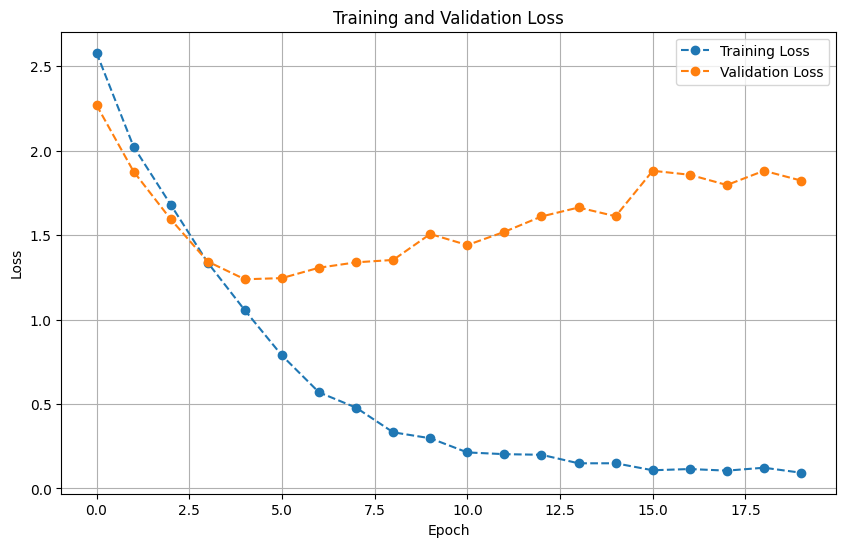

In [ ]:
import matplotlib.pyplot as plt
# Plot training, validation, and testing loss with respect to epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', linestyle='--', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

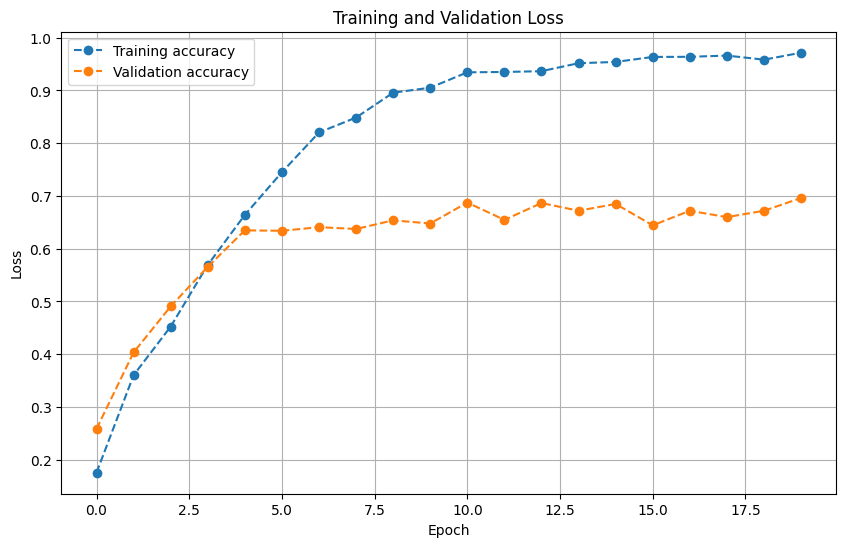

In [ ]:
import matplotlib.pyplot as plt
# Plot training, validation, and testing loss with respect to epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training accuracy', linestyle='--', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation accuracy', linestyle='--', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

### Report

In [ ]:
from sklearn.metrics import classification_report

# Assuming you have:
# - model: Your trained Keras model
# - x_test: Your test data
# - y_test: Your test labels (one-hot encoded)
# - encoder: Your LabelEncoder instance

# Get predictions
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1) # Convert probabilities to class labels

# Convert one-hot encoded y_test to class labels
#y_true = np.argmax(y_test, axis=1)

y_true = y_test

# Generate classification report
report = classification_report(y_true, y_pred, target_names=encoder.classes_,output_dict=True)
print(report)

# Convert report to a Pandas DataFrame for better formatting
df_report = pd.DataFrame(report).transpose()
df_report = df_report.round(4)
df_report['Metric'] = df_report.index
cols = ['Metric'] + [col for col in df_report.columns if col != 'Metric']
df_report = df_report[cols]
df_report.columns = ['Metric', 'Precision', 'Recall', 'F1-score', 'Support']

#print(tabulate(df_report, headers='keys', tablefmt='psql'))

# Display the DataFrame

# Optionally, save to CSV or Excel
#df_report.to_csv("classification_report.csv")
# df_report.to_excel("classification_report.xlsx")
df_report

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
{'Beet Armyworm': {'precision': 0.3142857142857143, 'recall': 0.22916666666666666, 'f1-score': 0.26506024096385544, 'support': 48.0}, 'Black Hairy': {'precision': 0.6578947368421053, 'recall': 0.746268656716418, 'f1-score': 0.6993006993006993, 'support': 67.0}, 'Cutworm': {'precision': 0.4020618556701031, 'recall': 0.45348837209302323, 'f1-score': 0.4262295081967213, 'support': 86.0}, 'Field Cricket': {'precision': 0.6455696202531646, 'recall': 0.6623376623376623, 'f1-score': 0.6538461538461539, 'support': 77.0}, 'Jute Aphid': {'precision': 0.6440677966101694, 'recall': 0.6386554621848739, 'f1-score': 0.6413502109704642, 'support': 119.0}, 'Jute Hairy': {'precision': 0.8048780487804879, 'recall': 0.38372093023255816, 'f1-score': 0.5196850393700787, 'support': 86.0}, 'Jute Red Mite': {'precision': 0.8490566037735849, 'recall': 0.8823529411764706, 'f1-score': 0.8653846153846154, 'support': 102.0}, 'Jute Semilooper': {'precision': 0.6966292134831461,

,Metric,Precision,Recall,F1-score,Support
Beet Armyworm,Beet Armyworm,0.3143,0.2292,0.2651,48.0000
Black Hairy,Black Hairy,0.6579,0.7463,0.6993,67.0000
Cutworm,Cutworm,0.4021,0.4535,0.4262,86.0000
Field Cricket,Field Cricket,0.6456,0.6623,0.6538,77.0000
Jute Aphid,Jute Aphid,0.6441,0.6387,0.6414,119.0000
Jute Hairy,Jute Hairy,0.8049,0.3837,0.5197,86.0000
Jute Red Mite,Jute Red Mite,0.8491,0.8824,0.8654,102.0000
Jute Semilooper,Jute Semilooper,0.6966,0.8857,0.7799,70.0000
Jute Stem Girdler,Jute Stem Girdler,0.8679,0.7667,0.8142,60.0000
Jute Stem Weevil,Jute Stem Weevil,0.6465,0.7273,0.6845,176.0000


### Confusion Matrix

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


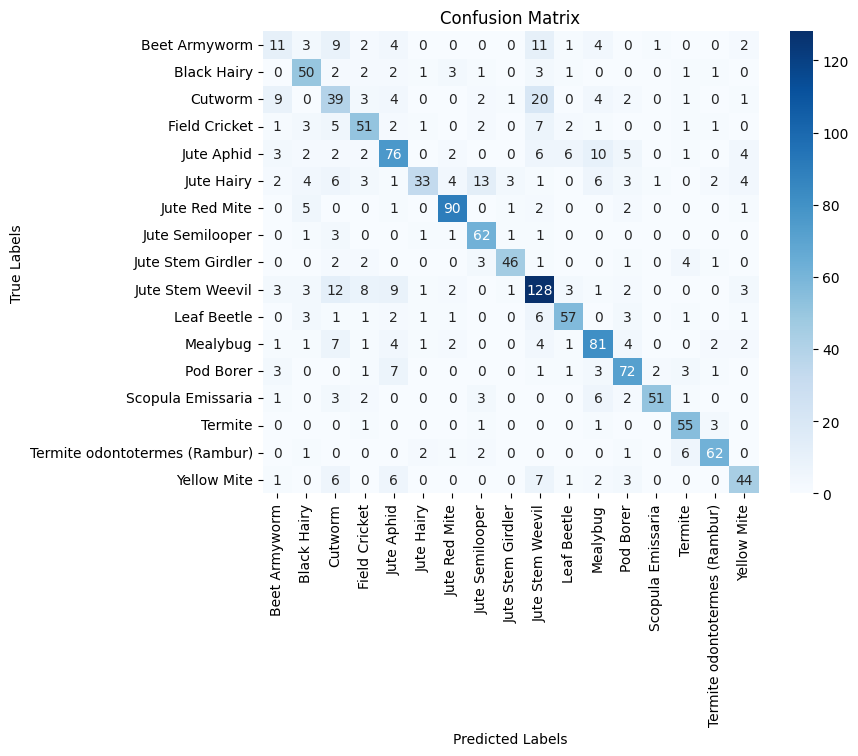

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have:
# - model: Your trained Keras model
# - x_test: Your test data
# - y_test: Your test labels (one-hot encoded)
# - encoder: Your LabelEncoder instance

# Get predictions (same as before)
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = y_test

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display the confusion matrix using seaborn
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

### Learnning rate against Performance

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# Define learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001]

# Initialize a dictionary to store histories for each learning rate
histories = {}

# Define the number of classes (replace with your encoder classes count)
num_classes = len(encoder.classes_)

# Loop through learning rates
for lr in learning_rates:
    print(f"Training with learning rate: {lr}")

    # Define optimizer with current learning rate
    optimizer = keras.optimizers.Adam(learning_rate=lr)

    # Define the model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model and save the history
    history = model.fit(
        x_train, y_train,
        epochs=20,
        validation_split=0.4,
        verbose=2
    )

    histories[lr] = history.history

Training with learning rate: 0.1


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
109/109 - 11s - 98ms/step - accuracy: 0.0861 - loss: 9870.8535 - val_accuracy: 0.1084 - val_loss: 2.8158
Epoch 2/20
109/109 - 2s - 19ms/step - accuracy: 0.0876 - loss: 2.8147 - val_accuracy: 0.0630 - val_loss: 2.8320
Epoch 3/20
109/109 - 3s - 25ms/step - accuracy: 0.0835 - loss: 2.8143 - val_accuracy: 0.1084 - val_loss: 2.8143
Epoch 4/20
109/109 - 3s - 23ms/step - accuracy: 0.1002 - loss: 2.8142 - val_accuracy: 0.1084 - val_loss: 2.8269
Epoch 5/20
109/109 - 2s - 21ms/step - accuracy: 0.0939 - loss: 2.8178 - val_accuracy: 0.1084 - val_loss: 2.8304
Epoch 6/20
109/109 - 2s - 19ms/step - accuracy: 0.0884 - loss: 2.8192 - val_accuracy: 0.1084 - val_loss: 2.8204
Epoch 7/20
109/109 - 2s - 18ms/step - accuracy: 0.0818 - loss: 2.8198 - val_accuracy: 0.0699 - val_loss: 2.8144
Epoch 8/20
109/109 - 3s - 26ms/step - accuracy: 0.0939 - loss: 2.8159 - val_accuracy: 0.0630 - val_loss: 2.8335
Epoch 9/20
109/109 - 2s - 21ms/step - accuracy: 0.0936 - loss: 2.8167 - val_accuracy: 0.1084 - val_l

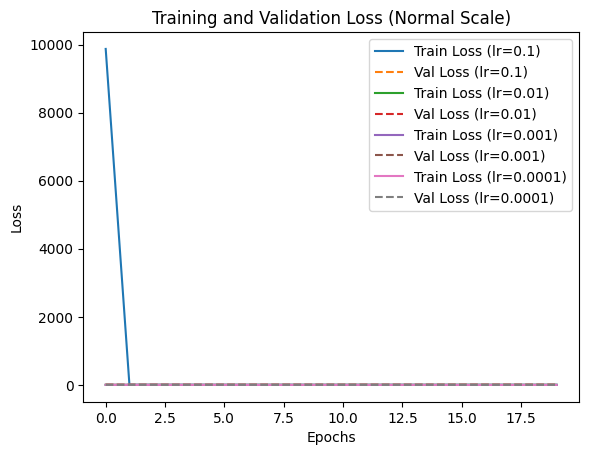

In [ ]:
# Normal scale plot
for lr, history in histories.items():
    plt.plot(history['loss'], label=f'Train Loss (lr={lr})')
    plt.plot(history['val_loss'], label=f'Val Loss (lr={lr})', linestyle='dashed')
plt.title('Training and Validation Loss (Normal Scale)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

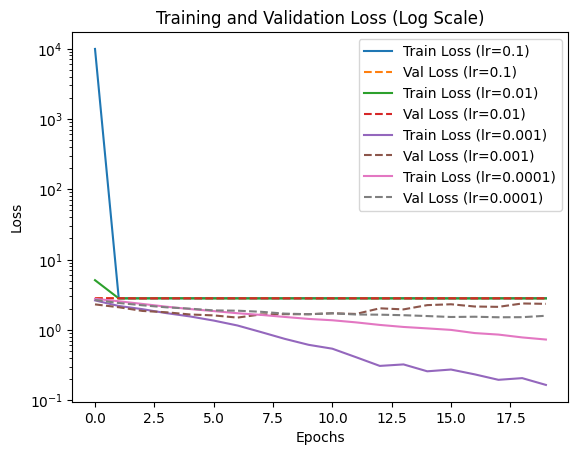

In [ ]:
# Log scale plot
for lr, history in histories.items():
    plt.plot(history['loss'], label=f'Train Loss (lr={lr})')
    plt.plot(history['val_loss'], label=f'Val Loss (lr={lr})', linestyle='dashed')
plt.yscale('log')
plt.title('Training and Validation Loss (Log Scale)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()